# Assignment 3: Model selection and regularization
## BUS 20800: Big Data
## Due: 11:59 am on Apr 22, 2022

----

## Part I

## Problem 1. **In-Sample and Out-of-Sample Performance**

**1. Linear model**

Consider a linear regression model with $p$ parameters, fit by least squares to a set of training data $(x_1, y_1), . . . , (x_N, y_N)$ drawn at random from a population. Let $\hat{\beta}$ be the least squares estimate. Suppose we have
some test data $(\tilde{x}_1, \tilde{y}_1), . . . , (\tilde{x}_M, \tilde{y}_M)$ drawn at random from the same population as the training data. Set

$$L_{train}\ \ (\beta) = \frac{1}{N}\sum_{i=1}^N(y_i - \beta^TX_i)^2
$$
$$
L_{test}\ \ (\beta) = \frac{1}{M}\sum_{i = 1}^M(\tilde{y}_i-\beta^T\tilde{X}_i)^2
$$

Show that
$$
\mathbb{E}(L_{train}\ \ (\hat{\beta})) \leq \mathbb{E}(L_{test}\ \ (\hat{\beta}))
$$





**Answer** :

1) $\displaystyle \mathbb{E}(\frac{1}{N} \sum_{i=1}^{N} (y_{i} - \beta^{T}x_{i})^2) = \mathbb{E}((y_{i} - \beta^{T}x_{i})^2)$ for any $i$ and $\beta^{T}$.


Let $\tilde{\beta}$ be the least squares estimate optimized for test data.


2) $\displaystyle \mathbb{E}(\frac{1}{N} \sum_{i=1}^{N} (y_{i} - \hat{\beta}^{T}x_{i})^2) = \mathbb{E}((y_{i} - \hat{\beta}^{T}x_{i})^2) \Rightarrow \mathbb{E}(A)$


$\displaystyle \mathbb{E}(\frac{1}{N} \sum_{i=1}^{N} (y_{i} - \tilde{\beta}^{T}x_{i})^2) = \mathbb{E}((y_{i} - \tilde{\beta}^{T}x_{i})^2) \Rightarrow \mathbb{E}(B)$


$\mathbb{E}(A) = \mathbb{E}(B)$ because X and Y are iid.


$\tilde{\beta}$ is the solution to $min$ $L_{test}(\beta)$, thus:


3) $\displaystyle \frac{1}{M} \sum^M (\tilde{y} - \tilde{\beta}^T \tilde{x}_i )^2 \le \frac{1}{M} \sum^M (\tilde{y} - \hat{\beta}^T \tilde{x}_i )^2$ (where $\displaystyle \frac{1}{M} \sum (\cdot)$ is analogue to $\mathbb{E}(\cdot)$)


4) $\displaystyle \mathbb{E} ( \tilde{y}_i - \tilde{\beta}^T \tilde{x}_i ) ^2 \le \mathbb{E} ( \tilde{y}_i - \hat{\beta}^T \tilde{x}_i ) ^2$


5) $\displaystyle \mathbb{E} ( y_i - \hat{\beta}^T x_i ) ^2 \le \mathbb{E} ( \tilde{y}_i - \hat{\beta}^T \tilde{x}_i ) ^2$ (by 2)


$\Rightarrow \displaystyle \mathbb{E}(L_{train}\ \ (\hat{\beta})) \leq \mathbb{E}(L_{test}\ \ (\hat{\beta}))$

## Problem 2. **Ridge Regression and Correlation Screening**

**1. Ridge and OLS**

Show that the ridge regression estimates can be obtained by OLS on an augmented data set. We augment the centered matrix $X$ with $p$ additional rows $\sqrt{\lambda}I$, and augment $y$ with $p$ zeros. By introducing artificial data with response value being zero, the fitting procedure is forced to shrink the coefficients toward zero. 

**Answer** :



Let $X_{a}$ be the augmented matrix such that 
$X_{a} = \left(\begin{array}{c}
X \\
\sqrt{\lambda} I_{p\times p} \\
\end{array}\right)$ and $y_{a} = \left(\begin{array}{c}
y \\
0_{p} \\
\end{array}\right)$.

The closed form solution of OLS is given by $\beta = (X^T X )^{-1} Xy$ and so after substituting in $X_a , y_a$ we see that $\beta = (X^T X + \lambda I)^{-1} Xy$ since $X_{a}^t X_{a} = X^T X + \lambda I$ and $X_{a}y_{a} = Xy$.




**2. Analytical formula for Ridge**

Show that for the ridge problem

$$\hat{\beta}_{ridge} = argmin _{\beta}||Y-X\beta||^2_2 +\lambda ||\beta||_2^2
$$

has the closed form:

$$
\hat{\beta}_{ridge} = (X^TX+\lambda I_d)^{-1}X^TY
$$

where $I_d$ is the identity matrix.


**Answer**:



$\beta = argmin$ $|| Y-X\beta||^{2}_{2} + \lambda ||\beta||^{2}_{2}\Rightarrow (Y-X\beta)^{T} (Y-X\beta) + \lambda \beta^{T}\beta \Rightarrow Y^T Y - \beta^T X^T Y - Y^T X \beta + \beta^T X^T X \beta + \lambda \beta^T \beta \Rightarrow Y^T Y - 2\beta^T X^T Y + \beta^T X^T X \beta + \lambda \beta^T \beta$


Taking $\displaystyle \frac{\partial}{\partial\beta}$ gets us:


$-2X^T Y + 2X^T X \beta + 2\lambda \beta=0 \Rightarrow (X^T X + \lambda I )\beta = X^T Y \Rightarrow \beta = (X^T X + \lambda I )^{-1} X^T Y$

**3. Ridge and Correlation Screening**

Consider a linear regression model $Y=X\beta+\varepsilon$, where $y$ is the $n × 1$ response vector, $X$ is the $n × p$ design matrix, $\beta$ is the $p × 1$ regression coefficient vector, and $\varepsilon$ is the $n×1$ random error vector with $E(\varepsilon) = 0$ and $Cov(ε) = \sigma^2 I_{d}$.

Assume each column of $X$ has zero mean and unit variance.

Use results of 2.2 to show that when $\lambda → \infty$, ridge regression outputs are exactly the correlations used in screening.



**Answer**:

-----

## Part II

In [1]:
# Setup codes

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

warnings.filterwarnings("ignore")

----

## Problem 3. **Best Subset, Forward Stepwise and Backward Stepwise Regression**



In this exercise, we simluate a linear regression problem, and compare selected features based on different methods.

### Part 1. Data Generating Process

Consider a linear regression problem $y = X^T\beta +\varepsilon$.  Suppose there are 300 observations on 16 standard Gaussian variables, with pairwise correlations all equal to 0.85. For the first 6 variables, the coefficients are drawn from a $N(0,0.4)$ distribution; the rests are 0. Therefore, the true DGP of $y$ only depends on the first 6 entires of $X$ variables. The noise follows $N(0,6.25)$.

In [3]:
# DGP, you don't need to modify any codes here.
N = 300
p = 16
rou = 0.85
num_signals = 6
sigma = np.ones((p,p)) * rou + (1-rou) * np.identity(p)
X = np.random.multivariate_normal(np.repeat(0,p), sigma, size = N)
X = pd.DataFrame(data = X)
beta = np.random.normal(0,0.4,num_signals).tolist()+ np.repeat(0,p-num_signals).tolist()
noise = np.random.normal(0,6.25, N)

y = X.dot(beta) +noise

### Part 2. Compare Three Methods



Suppose now we want to decide the best regression model with $k$ regressors, for each given $k$, where $k = 1,2,\cdots, p$, respectively. 

For best subset selection regression, how many models do you compare? What about forward stepwise and backward stepwise regressions?


**Answer**:  
For best subset selection regression, we want to compare all the possible subsets: $\sum_{k=1}^{p} {p \choose k}$. In our case, since p = 16, we have $\sum_{k=1}^{16} {16 \choose k} = 65535$ possible subsets and models, out of which we find the best subset.  

For forward stepwise regression, we want to iterate through the number of predictors and choose the best predictor, iteratively removing it from the next cycle. This means that we are comparing $\sum_{k=1}^{p} {k}$ where p = 16: $\sum_{k=1}^{16} {k} = 136$ models compared.

For backward stepwise regression, we want to start from the full model and compare all the models with 1 less predictor than it, removing the worst performing model among them. This means that we are comparing $\sum_{k=0}^{p} {p-k \choose p-k-1}$ where p = 16: $\sum_{k=0}^{16} {16-k \choose 16-k-1}$ = 136 models compared, the same as forward stepwise regression.

In [4]:
import math

def comb(p,k):
    f = math.factorial
    return f(p) / f(k) / f(p-k)

best_subset_total_models = 0
for i in range (1, 17):
    best_subset_total_models += comb(16, i)
best_subset_total_models
# import itertools
# for combo in itertools.combinations(16, 16):
#     print(combo)


65535.0

Now let's see which model is selected by these three methods for a given $k$ number of regressors, and compare their running time.

Please finish Best_subset_selection, Forward_stepwise_selection, Backward_stepwise_selection in Stepwise_simulation.py before you run the following cells. You don't need to modify any codes here.

In [ ]:
from Stepwise_simulation import *

The following 3 methods will output the variables it selected with different numbers of regessors, respectively.

In [ ]:
# Best Subset selection
# Please finish the codes in Best_subset_selection(X,y,p)
df_best,time_best = Best_subset_selection(X,y,p)

Loop...:   0%|          | 0/15 [00:00<?, ?it/s]

In [12]:
df_best

,numb_features,RSS,R_squared,features
0,1,12471.054740,0.046620,"(8,)"
1,2,12391.527512,0.052700,"(8, 10)"
2,3,12323.754848,0.057881,"(4, 8, 10)"
3,4,12260.881282,0.062687,"(4, 7, 8, 10)"
4,5,12208.403698,0.066699,"(0, 4, 7, 8, 10)"
5,6,12159.151236,0.070464,"(0, 4, 7, 8, 9, 10)"
6,7,12123.992877,0.073152,"(0, 4, 6, 7, 8, 9, 10)"
7,8,12091.994094,0.075598,"(0, 4, 6, 7, 8, 9, 10, 13)"
8,9,12069.818993,0.077293,"(0, 4, 6, 7, 8, 9, 10, 13, 14)"
9,10,12045.045690,0.079187,"(0, 4, 5, 6, 7, 8, 9, 10, 13, 14)"


In [ ]:
# Forward Stepwise selection
# Please finish the codes in Forward_stepwise_selection(X,y,p)
df_forward, time_forward = Forward_stepwise_selection(X,y,p)

In [ ]:
df_forward

,numb_features,RSS,R_squared,features
0,1,12471.054740,0.046620,[8]
1,2,12391.527512,0.052700,"[8, 10]"
2,3,12323.754848,0.057881,"[8, 10, 4]"
3,4,12260.881282,0.062687,"[8, 10, 4, 7]"
4,5,12208.403698,0.066699,"[8, 10, 4, 7, 0]"
5,6,12159.151236,0.070464,"[8, 10, 4, 7, 0, 9]"
6,7,12123.992877,0.073152,"[8, 10, 4, 7, 0, 9, 6]"
7,8,12091.994094,0.075598,"[8, 10, 4, 7, 0, 9, 6, 13]"
8,9,12069.818993,0.077293,"[8, 10, 4, 7, 0, 9, 6, 13, 14]"
9,10,12045.045690,0.079187,"[8, 10, 4, 7, 0, 9, 6, 13, 14, 5]"


In [ ]:
# Backward Stepwise selection
# Please finish the codes in Backward_stepwise_selection(X,y,p)
df_backward, time_backward = Backward_stepwise_selection(X,y,p)

In [ ]:
df_backward

,numb_features,RSS,R_squared,features
0,1,11996.998833,0.082860,[11]
1,2,12001.818362,0.082492,"[11, 12]"
2,3,12006.425211,0.082140,"[11, 12, 1]"
3,4,12013.494648,0.081599,"[11, 12, 1, 2]"
4,5,12029.217254,0.080397,"[11, 12, 1, 2, 3]"
5,6,12045.045690,0.079187,"[11, 12, 1, 2, 3, 15]"
6,7,12069.818993,0.077293,"[11, 12, 1, 2, 3, 15, 5]"
7,8,12091.994094,0.075598,"[11, 12, 1, 2, 3, 15, 5, 14]"
8,9,12123.992877,0.073152,"[11, 12, 1, 2, 3, 15, 5, 14, 13]"
9,10,12159.151236,0.070464,"[11, 12, 1, 2, 3, 15, 5, 14, 13, 6]"


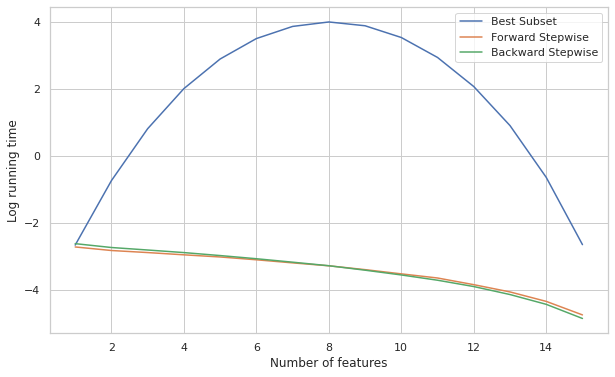

In [10]:
# Run this cell to visualize the running time. You don't need to modify any codes here.

running_time = pd.DataFrame({'Best Subset': np.log(time_best),'Forward Stepwise': np.log(time_forward),'Backward Stepwise': np.log(time_backward)})
running_time.index = range(1,16)

# Visualize the results
running_time.plot(figsize = (10,6))
plt.xlabel('Number of features')
plt.ylabel('Log running time')
plt.show()

Based on this plot and these output DataFrames, comment on what you find. 


**Answer**:
It seems that as the number of features increase, the log running time for forward and backward stepwise selection monotonically decrease. This makes sense because the greater the number of features, the less models we have to compare. Most of the computational time results from fitting a new model so a decrease in models to compare also decreases computational time. For best subset selection, the log running time increases until it hits a peak at 8 features and decreases after. Again, this makes sense because the number of models we have to compare increases until p choose p/2, after which it starts to decrease. Since p = 16, the number of models increases until 8 features, after which they decrease, and following our earlier logic, less models results in less computational time.



-----

## Problem 4. Sparse Signal Recovery

In this exercise, we will generate a simulated linear regression problem and use Lasso to see if this method can recover the sparse signals.

### Part 1. Data Generating Process

In [59]:
# DGP, you don't need to modify any codes here

n_samples, n_features = 50, 100
num_signal = 10
X = np.random.randn(n_samples, n_features)

# Construct the signals
idx = np.arange(n_features)

coef = 5 * np.random.randn(n_features)
inds = np.arange(n_features)

# Shuffle index and sparsify the signals
np.random.shuffle(inds)
coef[inds[num_signal:]] = 0

# Add noise
y = np.dot(X, coef) + 0.01 * np.random.normal(size=n_samples)

### Part 2. Fit Lasso for signal recovery

In [97]:
# Split data in training set and test set. You don't need to modify any codes here.
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.4)

Please finish the following cell to fit Lasso, output a model named lasso, and calculate the OOS R^2: 



In [104]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, LassoCV
from Index_track import Normalize

##############################################################################
### TODO: Fit a lasso model here, and calculate the OOS R square           ###
##############################################################################

model = LassoCV(cv = 5, random_state = 0, max_iter = 10000)
model.fit(X_train, y_train)
alpha_ = model.alpha_

lasso = Lasso(max_iter = 10000)
lasso.set_params(alpha=alpha_).fit(X_train,y_train)
y_pred = lasso.predict(X_test)
r2_score(y_test, y_pred)


##############################################################################
#                               END OF YOUR CODE                             #
##############################################################################


0.9774126802307511

Visualize and compare the results. You don't need to modify any codes here.

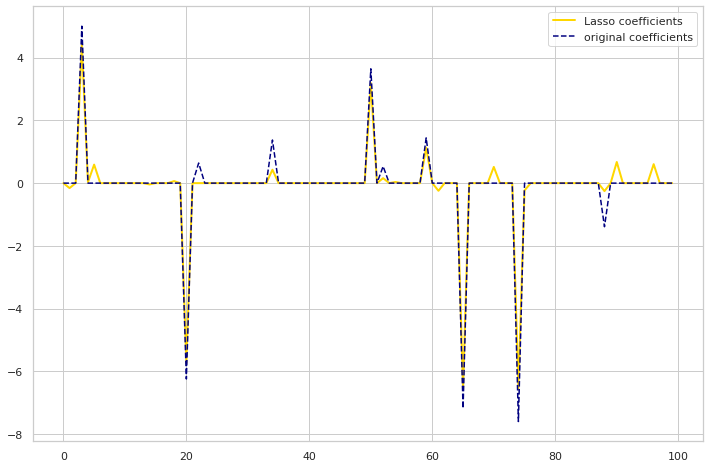

In [107]:
plt.figure(figsize = (12,8))
plt.plot(lasso.coef_, color='gold', linewidth=2, label='Lasso coefficients')
plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend(loc='best')

plt.show()

----

## Problem 5. **Track S&P500 index**

**Background**: 

The S&P 500 Index, or Standard & Poor's 500 Index, is a market-capitalization-weighted index of 500 (approximately) leading publicly traded companies in the U.S. It is regarded as one of the best gauges of prominent American equities' performance, and by extension, that of the stock market overall.

In this exercise, we consider the daily values of the SP500 index as well as the daily stock prices of 500 major stocks at the same time period.



**Purpose**:

You can't directly invest in the S&P 500 because it's an index. Buying a basket of all component stocks may induce high transaction costs. Instead, one may be interested in a portfolio which contains fewer stocks to track the index.

In [2]:
# Load data
_DATA_DIR = "/classes/2080001_spr2022/Data/"
sp500 = pd.read_csv('%s/index_track.csv'%(_DATA_DIR), index_col = 0)
sp500 = sp500.set_index('Date')

In [3]:
# Set up codes
from Index_track import *

### Part 1.  Construct a parsimonious portfolio 

Construct a parsimonious portfolio that tracks  the S\&P500
index approximately. 

Finish the next cell to construct a Portfolio using training set and use Portfolio_visualize to check the OOS performance of this portfolio. 

Note we do not shuffle data when creating training set and test set on time series data.

In [4]:
# Based on price information to get stock returns for the index and individual stocks
sp500_ret = sp500.pct_change() # day over day return
sp500_ret.dropna(inplace=True)

In [5]:
port = Portfolio_construction(sp500_ret)

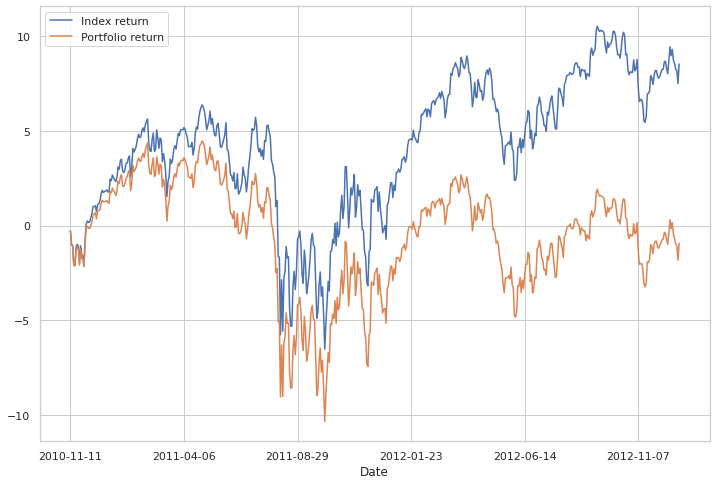

In [6]:
Portfolio_visualize(port[1],port[2])

How many stocks have non-zero weights?

**Answer**:

In [7]:
len([x for x in port[0] if x != 0])

222

Try different tuning parameters to see how this changes the above question. 

What results do you find when tuning parameter = 0 / $\infty$?

**Answer**:

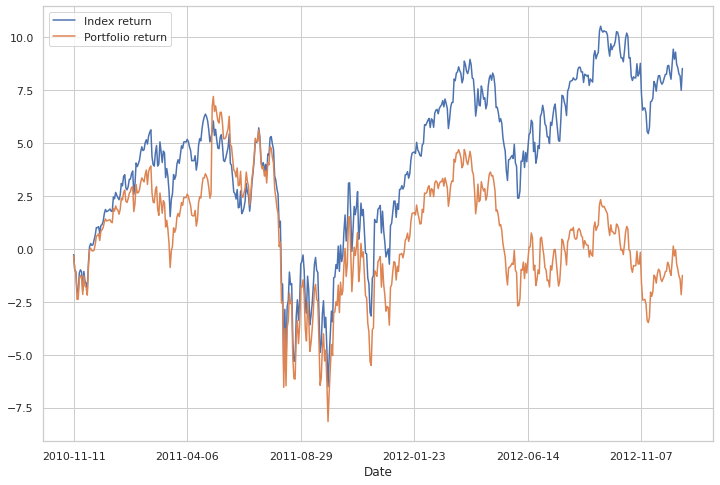

In [11]:
port_0 = Portfolio_construction(sp500_ret,set_alp = True, alp = 0)
Portfolio_visualize(port_0[1],port_0[2])

In [15]:
len([x for x in port_0[0] if x != 0])

449

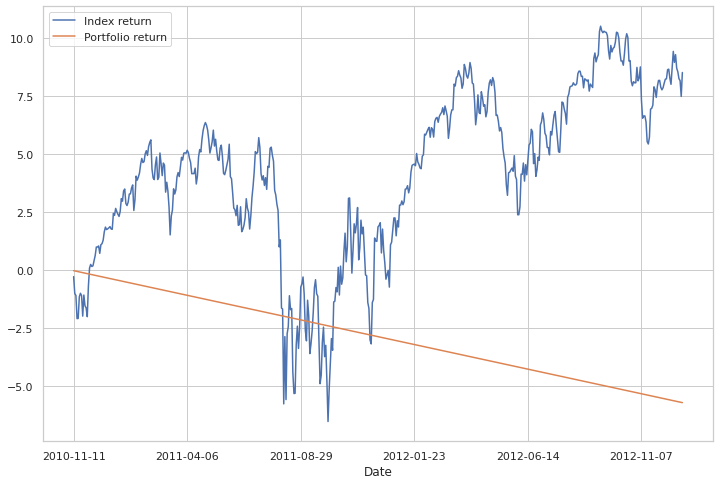

In [14]:
port_inf = Portfolio_construction(sp500_ret,set_alp = True, alp = 1000000)
Portfolio_visualize(port_inf[1],port_inf[2])

In [16]:
len([x for x in port_inf[0] if x != 0])

0

### Part 2. Rebalance the portfolio

In this exercise, we implement the above portfolio on a rolling window basis. Say, use the first 60-day window to train your model, and use the next 60 day as OOS to check its performance, and continue for the rest of the OOS periods. 


Finish the codes in Portfolio_rebalance() and run the cell below to construct and evalute this portfolio.

In [52]:
rebal = Portfolio_rebalance(sp500_ret)

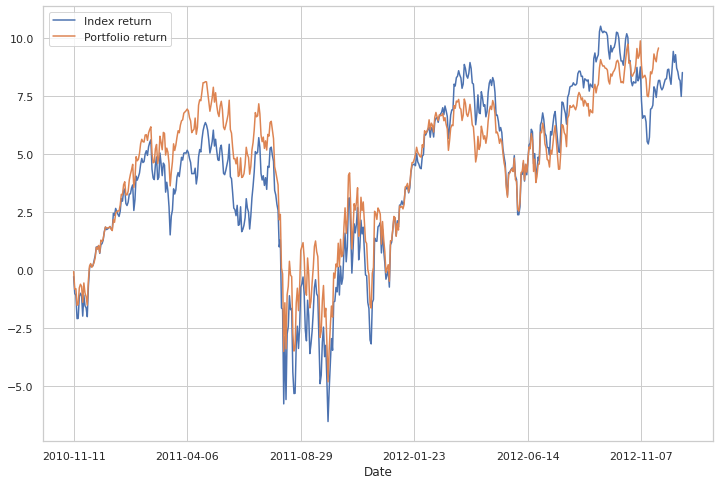

In [14]:
Portfolio_visualize(port[1],rebal[1])

How many stocks have the non-zero weight? How stable is your portfolio? 

**Answer**:

In [91]:
stock_weights = rebal[0].dropna()
stock_weights = stock_weights.apply(pd.to_numeric)

In [94]:
rows = []
for y in range(0,stock_weights.shape[1]):
    rows.append([stock_weights.columns[y], len([x for x in stock_weights.iloc[:,y] if x != 0])])
stock_freq = pd.DataFrame(rows, columns = ["stock",'count'])

In [97]:
# pool of stocks the rolling portfolio draws from
stock_freq[stock_freq['count']!=0].shape[0]

393

In [101]:
# 5 most used stocks
stock_freq.sort_values(by = 'count',ascending=False)[0:5]

,stock,count
442,XOM,15
323,PFE,14
213,IBM,12
2,AAPL,11
321,PEP,10


In [98]:
# average number of stocks used in the portfolio per period
stock_weights['stocks_used'] = stock_weights.astype(bool).sum(axis=1)
stock_weights['stocks_used'].mean() 

60.904761904761905